# QUELLE ÉVOLUTION DES VISITES EN SALLE D'ÉTUDE ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns

from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 09-01-2024 à 10h14


In [3]:
db_conn= DbConn().create_engine()

In [4]:
query = """SELECT datetime_entree,cardnumber
FROM statdb.stat_freq_etude sfe
WHERE YEAR(datetime_entree)>='2019'"""

In [5]:
etude = pd.read_sql(query,db_conn)

In [6]:
df = EvolutionActivite(df=etude,df_subject='visites_etude_mediatheque',text="visistes en salle d'étude")

In [7]:
df.add_columns()

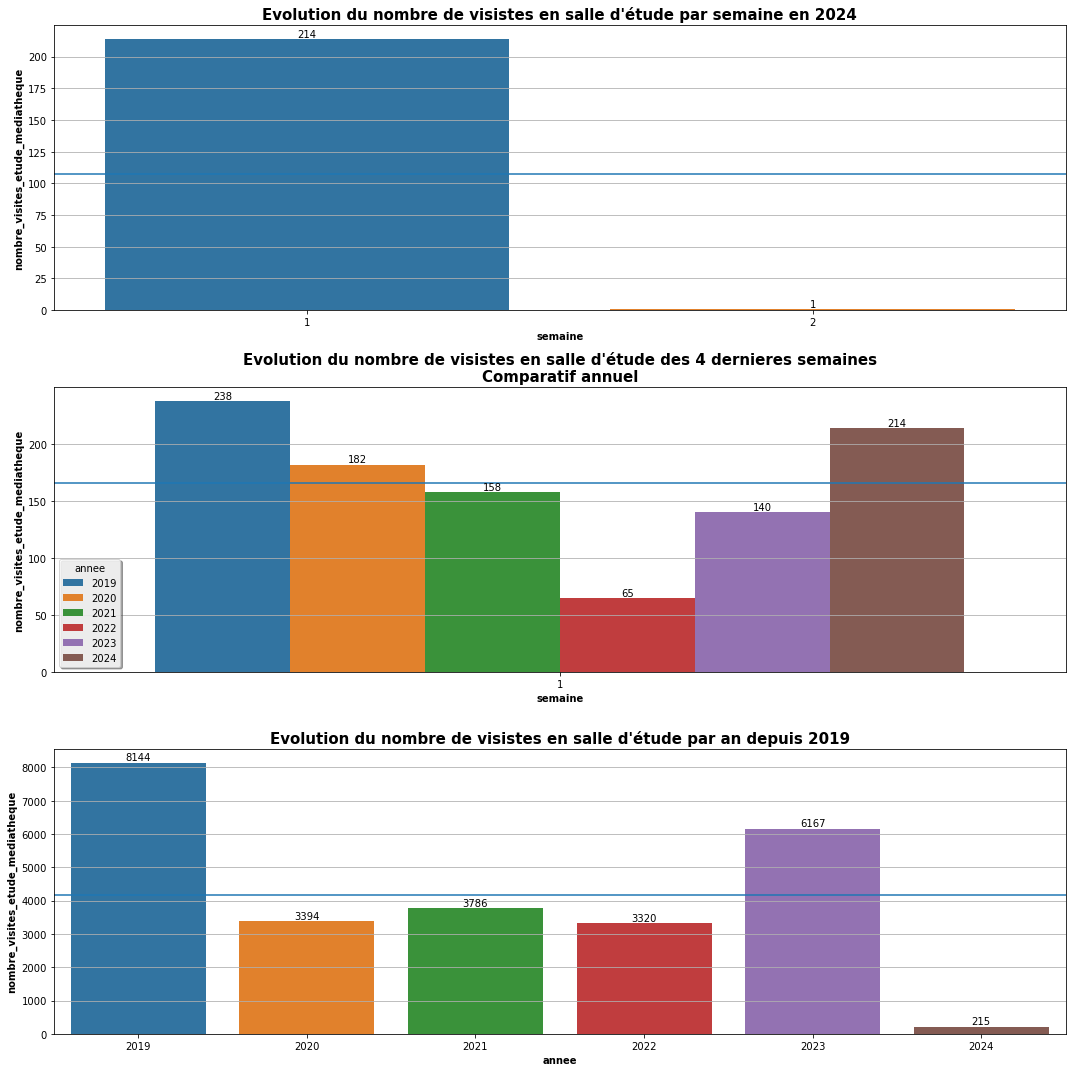

In [8]:
df1 = df.evolution_byweek_thisyear()
df2 = df.evolution_4lastweek()
df3 = df.evolution_by_year()
df4 = df.distinct_evolution_byweek_thisyear()
df5 = df.distinct_evolution_4lastweek()
df6 = df.distinct_evolution_by_year()

f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))
#1er graphique
sns.barplot(data=df.evolution_byweek_thisyear(),x='semaine',y='nombre_visites_etude_mediatheque',ax=ax[0])
ax[0].axhline(y=df1["nombre_visites_etude_mediatheque"].mean())
ax[0].set_title(df.titre_graph1())
for i in ax[0].containers:
    ax[0].bar_label(i,)
#2e graphique
sns.barplot(data=df.evolution_4lastweek(),x='semaine',y='nombre_visites_etude_mediatheque',hue='annee',ax=ax[1])
ax[1].axhline(y=df2["nombre_visites_etude_mediatheque"].mean())
ax[1].set_title(df.titre_graph2())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df.evolution_by_year(),x='annee',y='nombre_visites_etude_mediatheque',ax=ax[2])
ax[2].axhline(y=df3['nombre_visites_etude_mediatheque'].mean())
ax[2].set_title(df.titre_graph3())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()